# Preamble 

In [55]:
import os
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD')

In [56]:
%matplotlib inline 

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble
import mycode.weights as weights 
import mycode.maps as maps 

from tqdm import tqdm 

In [57]:
%run mycode/preamble.py

In [58]:
from importlib import reload
reload(errors)
reload(weights)
reload(preamble)
reload(maps)

<module 'mycode.maps' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/mycode/maps.py'>

# Read catalogues and filter

In [9]:
#filters to apply as reading the catalogue. 
prefilters = [
    maps.get_non_duplicated_cat
]


ffilters = [maps.good, maps.best]

## Default step size

In [11]:
#default step size
main_catsLSST = maps.retrieve_cats("final_fitsLSST", only_zero_shear=True)
pfmain_catsLSST = maps.get_filter_cats(main_catsLSST, prefilters)
cat1 = pfmain_catsLSST[0]

scat1 = maps.get_filter_cats(pfmain_catsLSST, ffilters)[0]

retrieving zero shear cat from default step size catalogue...


## 0.001 step size 

In [12]:
#0.001 step size
main_catsLSST_ss1 = maps.retrieve_cats("final_fitsLSST_ss", only_zero_shear=True)
pfmain_catsLSST_ss1 = maps.get_filter_cats(main_catsLSST_ss1, prefilters)
cat2 = pfmain_catsLSST_ss1[0]

scat2 = maps.get_filter_cats(pfmain_catsLSST_ss1, ffilters)[0]

retrieving zero shear cat from step size .001 catalogue...


<font size="3">**Check that no duplicates remain and catalogues have same galaxies**</font> 

In [14]:
print(len(list(set(cat1['db_id']))))
print(len(cat1['db_id']))
print()
print(len(list(set(cat2['db_id']))))
print(len(cat2['db_id']))

802326
802326

802326
802326


In [16]:
s1 = set(cat1['db_id'])
s2 = set(cat2['db_id'])

print(s1.difference(s2))
print(s2.difference(s1))

set()
set()


<font size="3">
    Discrepancy eliminated! 
</font>

# How do the two differ exactly? 

## Error on shape

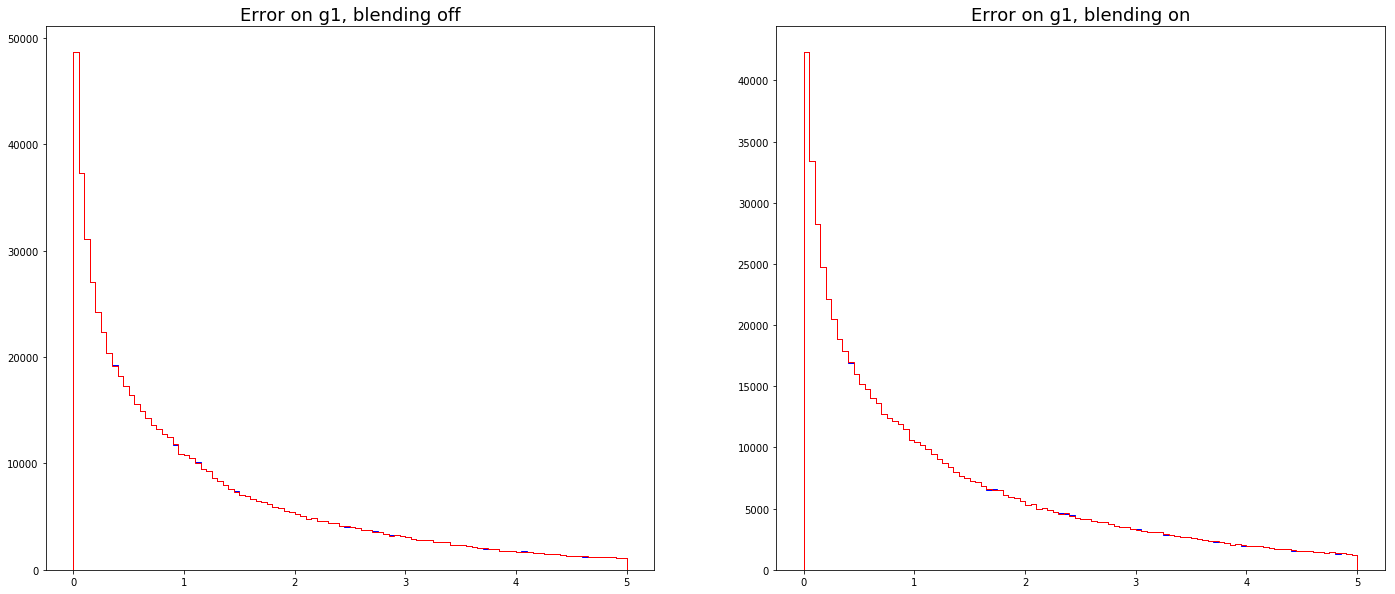

In [24]:
fig, axs = plt.subplots(ncols = 2, nrows=1, figsize=(24,10))
ax1, ax2 = axs.flatten() 

xrange = [0, 5]


ax1.hist(cat1['dg1'], histtype='step', color='b', range=xrange, bins=100);
ax1.hist(cat2['dg1'], histtype='step', color='r', range=xrange, bins=100);
ax1.set_title("Error on g1, blending off", fontsize=18); 

ax2.hist(cat1['dg1_grp'], histtype='step', color='b', range=xrange, bins=100);
ax2.hist(cat2['dg1_grp'], histtype='step', color='r', range=xrange, bins=100);
ax2.set_title("Error on g1, blending on", fontsize=18); 

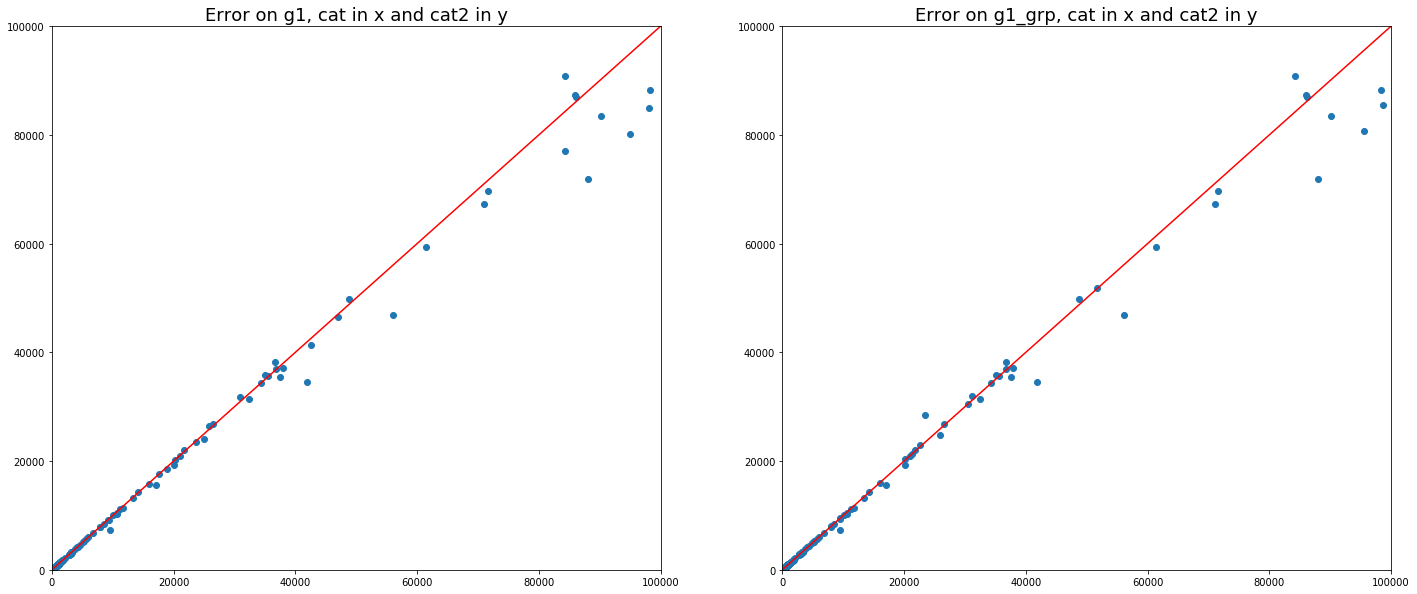

In [43]:
fig, axs = plt.subplots(ncols = 2, nrows=1, figsize=(24,10))
ax1, ax2 = axs.flatten() 
xrange = [0, 1e5]


ax1.scatter(cat1['dg1'], cat2['dg1'])
ax1.set_title("Error on g1, cat in x and cat2 in y", fontsize=18); 
ax1.plot([0,1e10],[0,1e10], c='r')
ax1.set_xlim(xrange);
ax1.set_ylim(xrange);
# ax1.set_xscale('log')
# ax1.set_yscale('log')




ax2.scatter(cat1['dg1_grp'], cat2['dg1_grp'])
ax2.set_title("Error on g1_grp, cat in x and cat2 in y", fontsize=18); 
ax2.plot([0,1e10],[0,1e10], c='r')
ax2.set_xlim(xrange);
ax2.set_ylim(xrange);
# ax2.set_xscale('log')
# ax2.set_yscale('log')




<font size="3">
It seems that points with very high error are the ones that deviate more strongly. We expect that the ones with high error correspond to the ones where fisher matrix is close to being singular. 
    
**Q: Is there a relationship between singular fisher matrices and step sizes?**
</font>

## Bias on shape

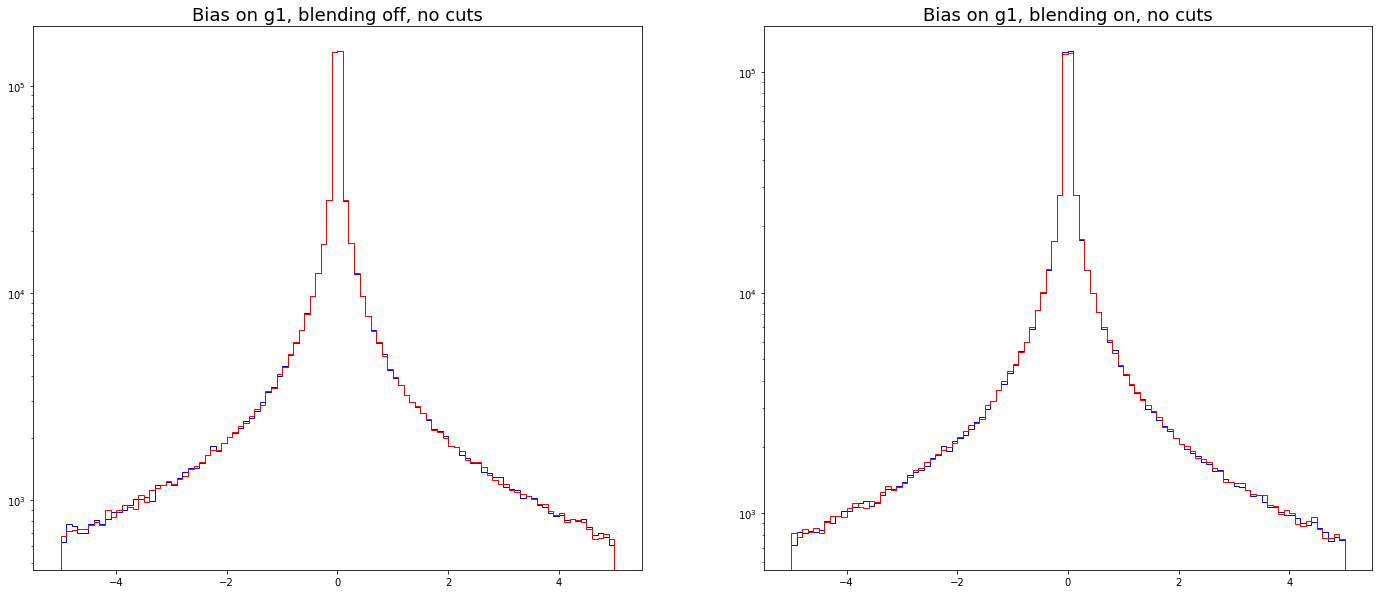

In [80]:
fig, axs = plt.subplots(ncols = 2, nrows=1, figsize=(24,10))
ax1, ax2 = axs.flatten() 

xrange = [-5, 5]


ax1.hist(cat1['bias_g1'], histtype='step', color='b', range=xrange, bins=100);
ax1.hist(cat2['bias_g1'], histtype='step', color='r', range=xrange, bins=100);
ax1.set_title("Bias on g1, blending off, no cuts", fontsize=18); 
ax1.set_yscale('log')

ax2.hist(cat1['bias_g1_grp'], histtype='step', color='b', range=xrange, bins=100);
ax2.hist(cat2['bias_g1_grp'], histtype='step', color='r', range=xrange, bins=100);
ax2.set_title("Bias on g1, blending on, no cuts", fontsize=18); 
ax2.set_yscale('log')



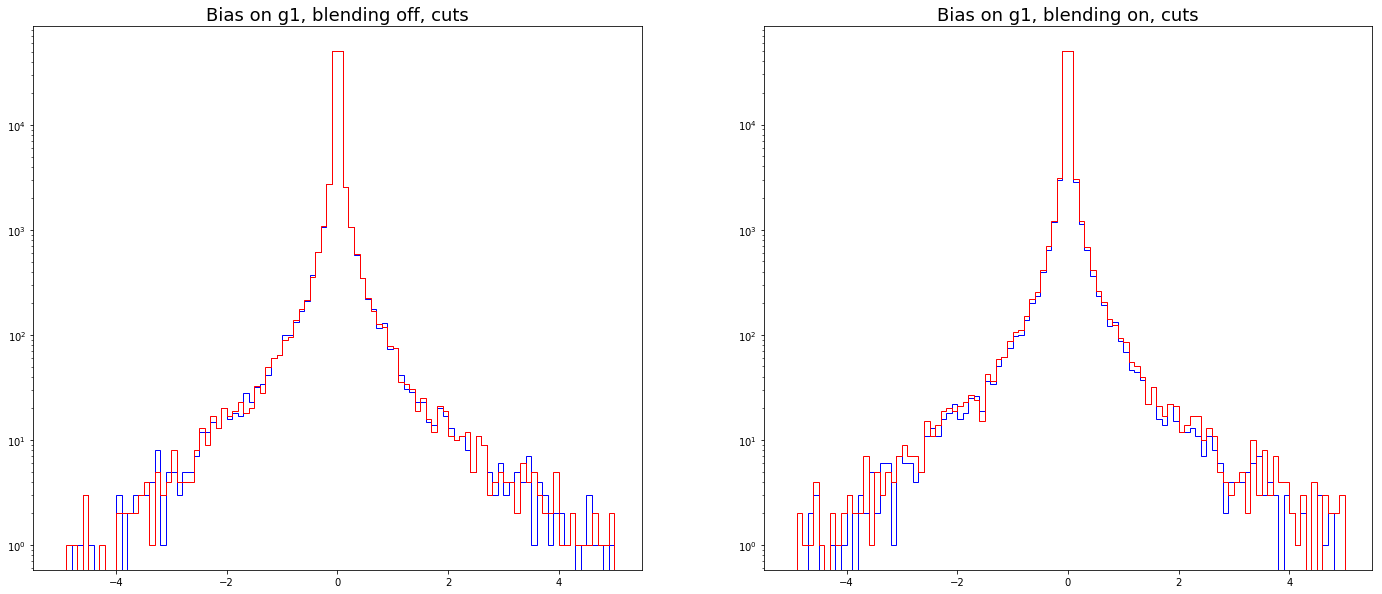

In [86]:
fig, axs = plt.subplots(ncols = 2, nrows=1, figsize=(24,10))
ax1, ax2 = axs.flatten() 

xrange = [-5, 5]


ax1.hist(scat1['bias_g1'], histtype='step', color='b', range=xrange, bins=100);
ax1.hist(scat2['bias_g1'], histtype='step', color='r', range=xrange, bins=100);
ax1.set_title("Bias on g1, blending off, cuts", fontsize=18); 
ax1.set_yscale('log')

ax2.hist(scat1['bias_g1_grp'], histtype='step', color='b', range=xrange, bins=100);
ax2.hist(scat2['bias_g1_grp'], histtype='step', color='r', range=xrange, bins=100);
ax2.set_title("Bias on g1, blending on, cuts", fontsize=18); 
ax2.set_yscale('log')




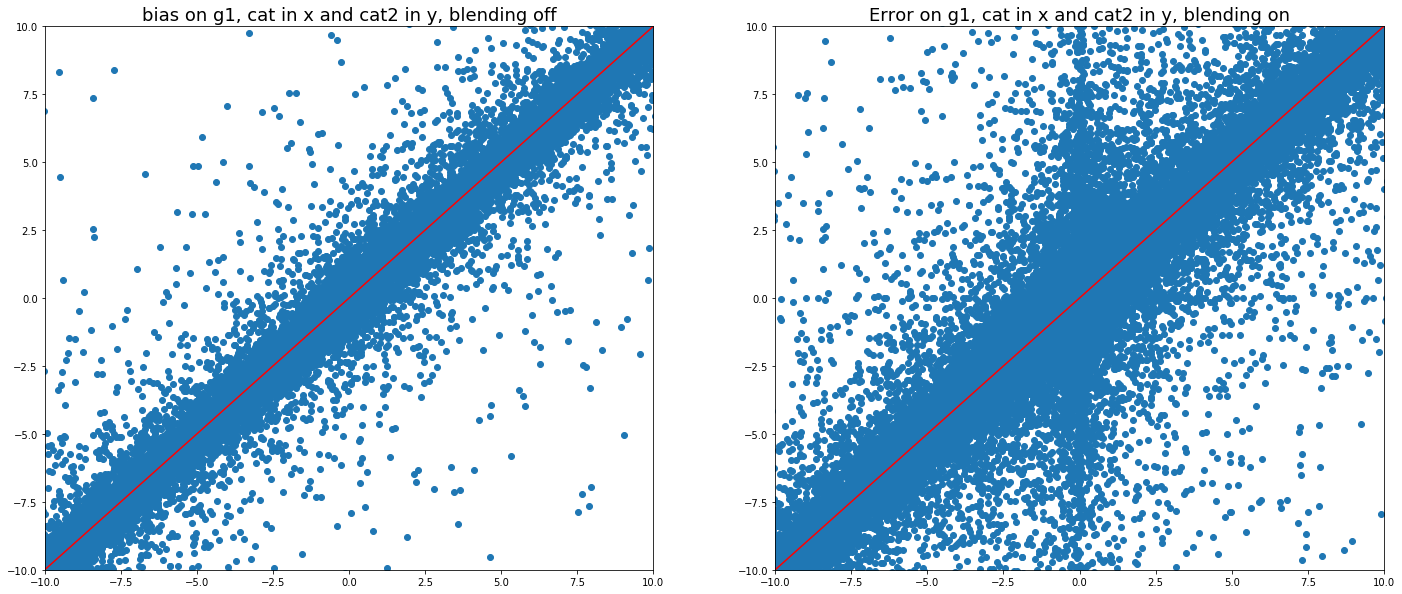

In [90]:
fig, axs = plt.subplots(ncols = 2, nrows=1, figsize=(24,10))
ax1, ax2 = axs.flatten() 
xrange=[-10, 10]



ax1.scatter(cat1['bias_g1'], cat2['bias_g1'])
ax1.set_title("bias on g1, cat in x and cat2 in y, blending off", fontsize=18); 
ax1.plot([-1e10,1e10],[-1e10,1e10], c='r')
ax1.set_xlim(xrange);
ax1.set_ylim(xrange);





ax2.scatter(cat1['bias_g1_grp'], cat2['bias_g1_grp'])
ax2.set_title("Bias Blending on on g1, cat in x and cat2 in y, blending on", fontsize=18); 
ax2.plot([-1e10,1e10],[-1e10,1e10], c='r')
ax2.set_xlim(xrange);
ax2.set_ylim(xrange);





## weights 

<font size="3"> This is one of the most striking differences:  </font>
    
    

(-3, 3)

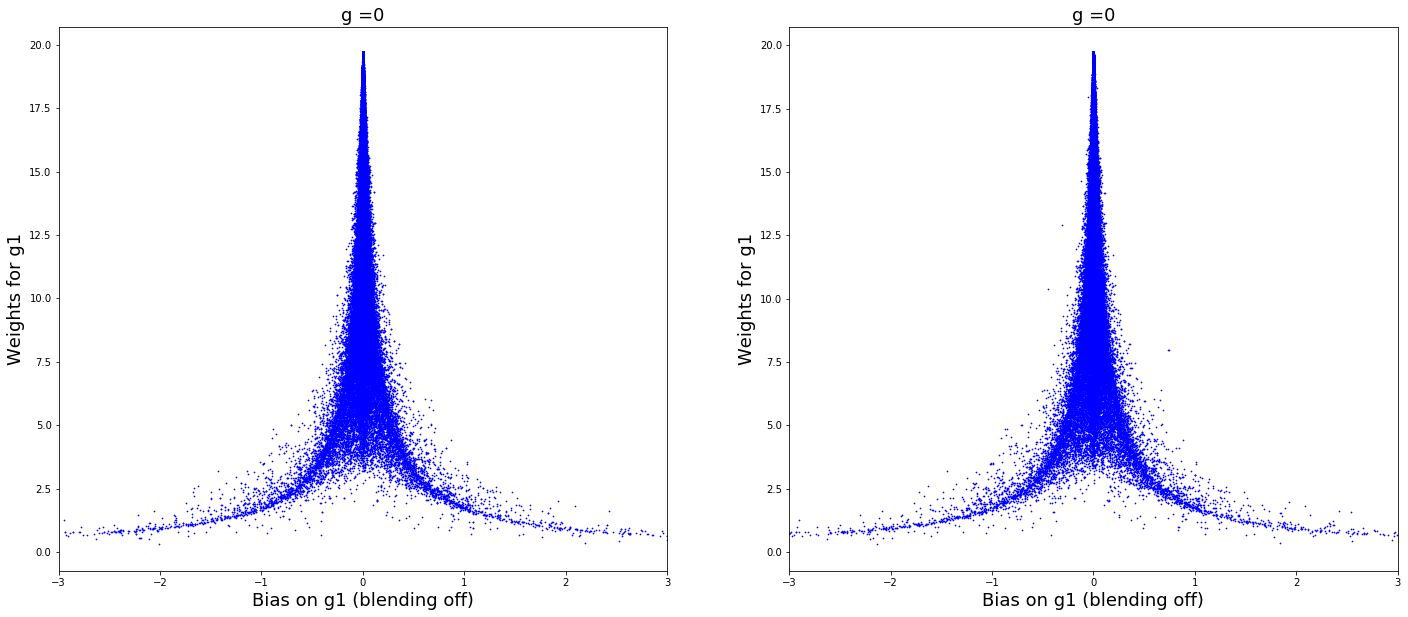

In [44]:
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(24,10)) 
ax1, ax2 = axs.flatten() 

weights1 = weights.get_weights(scat1, '1', 'iso')
ax1.scatter(scat1['bias_g1'], weights1, alpha=1, s=0.5, c='b')
ax1.set_title('g =0', size = 18)
ax1.set_xlabel('Bias on g1 (blending off)', size=18)
ax1.set_ylabel('Weights for g1', size=18)
ax1.set_xlim(-3, 3)

weights2 = weights.get_weights(scat2, '1', 'iso')
ax2.scatter(scat2['bias_g1'], weights2, alpha=1, s=0.5, c='b')
ax2.set_title('g =0', size = 18)
ax2.set_xlabel('Bias on g1 (blending off)', size=18)
ax2.set_ylabel('Weights for g1', size=18)
ax2.set_xlim(-3, 3)

(-3, 3)

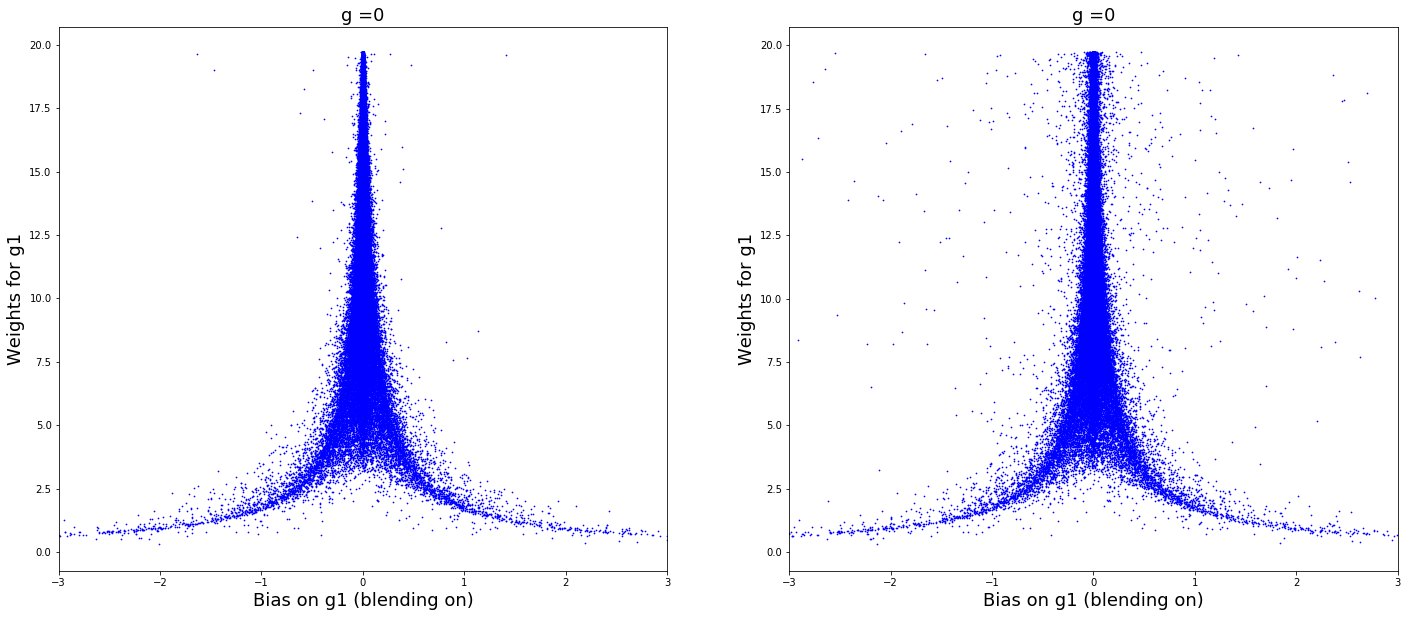

In [42]:
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(24,10)) 
ax1, ax2 = axs.flatten() 

weights1 = weights.get_weights(scat1, '1', 'grp')
ax1.scatter(scat1['bias_g1_grp'], weights1, alpha=1, s=0.5, c='b')
ax1.set_title('g =0', size = 18)
ax1.set_xlabel('Bias on g1 (blending on)', size=18)
ax1.set_ylabel('Weights for g1', size=18)
ax1.set_xlim(-3, 3)

weights2 = weights.get_weights(scat2, '1', 'grp')
ax2.scatter(scat2['bias_g1_grp'], weights2, alpha=1, s=0.5, c='b')
ax2.set_title('g =0', size = 18)
ax2.set_xlabel('Bias on g1 (blending on)', size=18)
ax2.set_ylabel('Weights for g1', size=18)
ax2.set_xlim(-3, 3)

# Note on variations of david package

<font size="3"> Recall that David's package assigns a `dx,dy` variation (how much to move galaxy centers when calculating partials) of LSST pixel scale /3  which is around `0.07` arcsecs. This is quite large for some of the galaxies in the catalogue (although just for a small percentage of them.</font> 

<font size="3">More specifically, the percentage of galaxies for which this would move them by their size is: </font>

In [46]:
len(cat1[cat1['sigma_m'] < 0.07])/ len(cat1) * 100  #recall sigma_m is in arcsecs. 

2.644311663837393

percent. 

# Dropping 

## Group sizes

In [60]:
grps1 = np.sort(list(set(cat1['grp_id']))) #sorted. 
grp_sizes1 = maps.get_group_sizes(cat1, grps1) #in order of grps. 

<font size="3"> 
**Histogram of group size** 
</font>

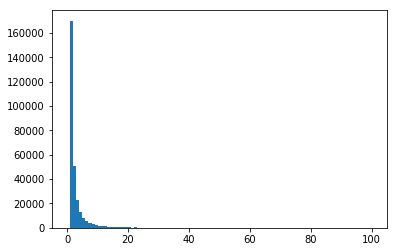

In [74]:
plt.hist(grp_sizes1, range=[0, 100], bins=100);

<font size="3">**Question:** How many groups have large group sizes? **A:** Not that many! </font>

In [75]:
sum(np.array(grp_sizes1) > 70) #number of groups with size greater than 70 
#quite low compared to the total number of groups... 

379

## Dropped galaxies 

<font size="3">This is a plot showing how many galaxies get dropped in each of the groups, showing that there is a small number of really bad ~large~ groups.</font>

In [68]:
hash_grpid1 = maps.get_hash(cat1, 'grp_id')

In [70]:
grp_dropped1 = []  #in order of grps. 
for grp_id in grps1: 
    cnt = 0
    for idx in hash_grpid1[grp_id]:
        if cat1[idx]['snr_grpf'] == 0: 
            cnt+=1
    grp_dropped1.append(cnt)

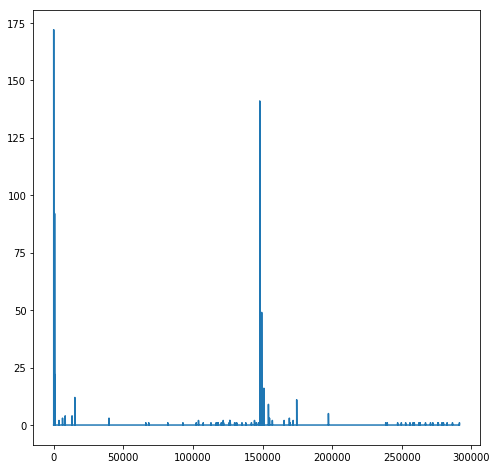

In [71]:
plt.figure(figsize=(8,8))
plt.plot(grp_dropped1)

<font size ="3"> 
What is the total number of galaxies across all groups that have at least one galaxy dropped. 
    
**A:** Not too many! 
</font>

In [79]:
x = np.sum(np.array(grp_sizes1)[np.array(grp_dropped1) > 0]); print(x)
print(x / len(cat1) *100) #percent 

1454
0.18122309385461768


## See if after dropping these groups step size dependence disappears on weight plots 

<font size="3">
In the last section we found a way to find the number of galaxies dropped in a group faster, which will be helpful going forward. 

Now we wonder whether removing this bad groups will solve our issues...  

**A:** Nope! 

Look at these galaxies: 
</font>

In [93]:
scat1[ (scat1['bias_g1_grp']< -2.9) & (scat1['dg1_grp'] < 0.1)]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
2200273635,2200075109,68,2,1,222,274,1089,1151,0.0,1.0,1489.7533,-855.9263,1.4208305,21.884293,-0.056919098,1253806.6,0.64233124,0.6512757,-0.10049086,-0.06107093,0.7228802,0.5707577,-1.2977557,0.89473283,0.9712107,216.50966,208.73979,208.649,80.26895,68.7535,0.024836157,0.013040399,0.0128556155,0.028192531,0.014996301,0.013725261,0.4930958,-0.19390063,-0.11785368,0.0,0.0,117.30674,-9.790696e-07,-4.963285e-05,-3.01557e-05,4.7486153e-09,-5.499419e-11,129657995000.0,170876.52,-129608.195,39078.99,-3617.2166,-21540.379,2352,False
2200313470,2200075109,68,3,1,142,169,1127,1151,1.0,0.0,1471.1592,-852.12036,0.4829577,22.46178,0.2850914,736606.2,0.31182554,0.36485127,0.39051983,-0.05711123,0.47331828,0.20543294,-0.07260736,0.71235377,0.9808606,195.57901,188.49936,188.43024,127.76183,127.48989,0.022506313,0.021215301,0.013366062,0.022546234,0.021233328,0.0133798085,0.4446129,0.6871633,-0.100495525,0.0,0.0,50.825123,-0.00064243696,0.0006944062,-0.00010155353,-1.3388657e-09,8.706417e-11,50917230.0,411.0047,-250.28218,369.99738,-72.978096,-55.53663,1542,False
2200783694,2200075109,68,6,1,220,248,1143,1165,0.9842181,0.01578191,1486.9033,-849.13666,1.4385002,23.13188,0.43351746,397370.53,0.43993554,0.61802447,0.28485572,-0.49623105,0.8433513,0.22949305,-0.5248425,0.8305421,0.9882007,91.75602,90.32986,90.31898,58.90264,58.8174,0.048553377,0.027410047,0.04074808,0.048588123,0.027417112,0.04075996,0.50497586,0.4375831,-0.7622801,0.0,0.0,117.86498,-0.0027300045,0.0017874996,-0.0031138803,5.6797487e-09,2.0293638e-09,518758000.0,2386.769,-566.1133,2832.2178,-326.467,311.29178,2331,False
2201600560,2200075109,68,11,1,260,286,1121,1148,1.0,0.0,1494.6241,-853.00775,0.5192342,24.032423,0.3987751,173371.77,0.7434956,0.78077585,-0.006156734,0.22101678,0.9309242,0.5938031,0.7993228,0.97885215,0.9622394,29.522226,29.407831,29.405844,17.961771,14.082619,0.06729466,0.052330114,0.058192283,0.075654976,0.065868944,0.06771148,0.6667243,-0.0116032595,0.41668367,0.0,0.0,452.44354,-0.0028333538,-5.803725e-05,0.002099723,-1.7619245e-08,3.821094e-08,5567177700.0,6960.1377,-60310.844,25610.035,-21170.957,-52577.28,2335,False
402701151821,402700032636,107,14,1,1126,1157,379,415,1.0,0.0,-851.5972,-640.5062,0.6946597,23.548777,0.68992424,270668.03,1.0496099,1.064915,-0.10741939,0.054188643,1.1844964,0.93008393,1.3371922,1.2216415,0.9832317,35.678886,35.545662,35.545353,21.20515,19.019524,0.048930068,0.041072987,0.04035276,0.05368632,0.0438397,0.044455,0.8446895,-0.20956452,0.10573532,0.0,0.0,457.174,-0.0011924868,-0.00045936563,0.00023072645,-2.4746922e-07,2.473395e-07,106414760.0,351.7701,-302.53217,137.42024,46.801228,234.12389,625,False
402700430052,402700362790,15,1,1,776,827,1496,1546,0.0,1.0,-199.61937,-415.65747,1.4044527,22.430077,-0.12874413,758432.5,0.7392342,0.7399894,0.014643762,-0.028401768,0.76324594,0.71597785,-0.54737604,0.96402186,0.9871589,122.2419,119.76833,119.76777,44.523216,43.05782,0.04213485,0.021783452,0.021811089,0.043487534,0.021967709,0.022736512,0.508183,0.028478833,-0.055158835,0.0,0.0,232.98074,5.9925318e-05,1.9465135e-05,-3.7720667e-05,6.0449345e-08,3.5974794e-09,7600539.5,17.347656,-3.5897896,11.008892,1.0495081,1.33124,1955,False


In [104]:
scat1[(scat1['grp_id']==2200075109) & (np.absolute(scat1['bias_g1_grp'])>1000) & (scat1['dg1_grp'] < .1) ]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
2200075109,2200075109,68,0,1,118,170,1102,1154,0.6811219,0.31887814,1468.8198,-854.3325,0.4970938,20.688435,0.8267937,3772018.0,0.41330498,0.43418348,0.17571549,0.13551967,0.517932,0.3298136,0.3284799,0.75188476,0.99853736,871.0972,761.1604,761.15515,482.506,481.68118,0.0044271615,0.003454685,0.0032465314,0.004434219,0.0034569532,0.0032505046,0.47445646,0.39453542,0.30426034,0.0,0.0,11.860298,-1.6391188e-05,1.1711764e-05,9.033661e-06,8.980933e-12,-3.8735005e-12,-12586772000.0,-5395.0356,1038.5594,790.3339,0.018747415,-0.4289703,1532,False
2200273635,2200075109,68,2,1,222,274,1089,1151,0.0,1.0,1489.7533,-855.9263,1.4208305,21.884293,-0.056919098,1253806.6,0.64233124,0.6512757,-0.10049086,-0.06107093,0.7228802,0.5707577,-1.2977557,0.89473283,0.9712107,216.50966,208.73979,208.649,80.26895,68.7535,0.024836157,0.013040399,0.0128556155,0.028192531,0.014996301,0.013725261,0.4930958,-0.19390063,-0.11785368,0.0,0.0,117.30674,-9.790696e-07,-4.963285e-05,-3.01557e-05,4.7486153e-09,-5.499419e-11,129657995000.0,170876.52,-129608.195,39078.99,-3617.2166,-21540.379,2352,False
2201600560,2200075109,68,11,1,260,286,1121,1148,1.0,0.0,1494.6241,-853.00775,0.5192342,24.032423,0.3987751,173371.77,0.7434956,0.78077585,-0.006156734,0.22101678,0.9309242,0.5938031,0.7993228,0.97885215,0.9622394,29.522226,29.407831,29.405844,17.961771,14.082619,0.06729466,0.052330114,0.058192283,0.075654976,0.065868944,0.06771148,0.6667243,-0.0116032595,0.41668367,0.0,0.0,452.44354,-0.0028333538,-5.803725e-05,0.002099723,-1.7619245e-08,3.821094e-08,5567177700.0,6960.1377,-60310.844,25610.035,-21170.957,-52577.28,2335,False


Very large biases and small errors remain even if group has all `snr_grpf > 0` as its elements, even if elements pass all the cuts: 

In [102]:
print(len(cat1[(cat1['grp_id']==2200075109) & (cat1['snr_grpf']==0)]))

0
